In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/tubes2_HeartDisease_train.csv')

In [3]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,54,1,4,125,216,0,0,140,0,0,?,?,?,1
1,55,1,4,158,217,0,0,110,1,2.5,2,?,?,1
2,54,0,3,135,304,1,0,170,0,0,1,0,3,0
3,48,0,3,120,195,0,0,125,0,0,?,?,?,0
4,50,1,4,120,0,0,1,156,1,0,1,?,6,3


In [4]:
df['Column14'].value_counts()

0    349
1    225
2     92
3     90
4     23
Name: Column14, dtype: int64

In [5]:
df.replace({"?":np.nan}, inplace=True)
print(len(df))
print("Percentage of Empty in Each Attributes")
df.isnull().sum(axis = 0)/len(df)

779
Percentage of Empty in Each Attributes


Column1     0.000000
Column2     0.000000
Column3     0.000000
Column4     0.060334
Column5     0.030809
Column6     0.100128
Column7     0.002567
Column8     0.056483
Column9     0.056483
Column10    0.062901
Column11    0.336329
Column12    0.659820
Column13    0.523748
Column14    0.000000
dtype: float64

In [6]:
df.drop(['Column12', 'Column13'], axis=1, inplace=True)
df.drop(df[pd.isnull(df['Column7'])].index, inplace=True)
df.drop(df[pd.isnull(df['Column5'])].index, inplace=True)
df.drop(df[pd.isnull(df['Column8'])].index, inplace=True)
df.drop(df[pd.isnull(df['Column9'])].index, inplace=True)
df.drop(df[pd.isnull(df['Column4'])].index, inplace=True)
df.drop(df[pd.isnull(df['Column10'])].index, inplace=True)
for column in df.columns:
    df[column] = pd.to_numeric(df[column])
    if (column == 'Column11'):
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        #df[column].fillna(df[column].mode()[0], inplace=True)
        #df[column].fillna(df[column].mean(), inplace=True)
        df[column].fillna(df[column].median(), inplace=True)
df.describe(include='all')

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column14
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,53.255682,0.765625,3.274148,132.207386,202.805398,0.127841,0.606534,138.427557,0.396307,4.037074,1.826705,0.968750
std,9.384165,0.423909,0.925450,19.150067,108.706558,0.334150,0.822868,26.017127,0.489477,7.894214,0.537178,1.120933
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,46.000000,1.000000,3.000000,120.000000,179.750000,0.000000,0.000000,120.000000,0.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,228.000000,0.000000,0.000000,140.000000,0.000000,1.000000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,159.250000,1.000000,3.000000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,529.000000,1.000000,2.000000,202.000000,1.000000,62.000000,3.000000,4.000000


In [7]:
#df = pd.get_dummies(data=df, columns=['Column3','Column7','Column11'])
df = pd.get_dummies(df, prefix=['Column7','Column11'], columns=['Column7','Column11'])
df.head()
#df['Column11'].unique()

,Column1,Column2,Column3,Column4,Column5,Column6,Column8,Column9,Column10,Column14,Column7_0,Column7_1,Column7_2,Column11_1.0,Column11_2.0,Column11_3.0
0,54,1,4,125,216,0.0,140,0,0.0,1,1,0,0,0,1,0
1,55,1,4,158,217,0.0,110,1,2.5,1,1,0,0,0,1,0
2,54,0,3,135,304,1.0,170,0,0.0,0,1,0,0,1,0,0
3,48,0,3,120,195,0.0,125,0,0.0,0,1,0,0,0,1,0
4,50,1,4,120,0,0.0,156,1,0.0,3,0,1,0,1,0,0


In [8]:
from sklearn.preprocessing import StandardScaler
cols = ['Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11','Column12','Column13',]
cols_to_norm = ['Column4','Column5','Column8','Column10']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])
#df.describe()
#df['Column10'].unique()

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column8', 'Column9', 'Column10', 'Column14', 'Column7_0', 'Column7_1',
       'Column7_2', 'Column11_1.0', 'Column11_2.0', 'Column11_3.0'],
      dtype='object')


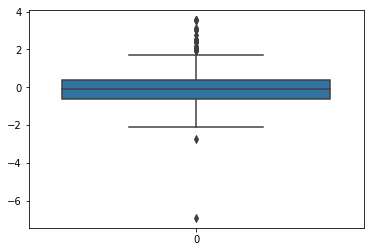

In [9]:
import seaborn as sns

print(df.columns)

sns.boxplot(data=df['Column4'])
#df = df.drop(df[df.Column4 > 2].index)
#df = df.drop(df[(df.Column4 > 2) & (df.Column14 < 2)].index)
#df = df.drop(df[df.Column4 < -1].index)
#df = df.drop(df[(df.Column4 < -1) & (df.Column14 < 2)].index)

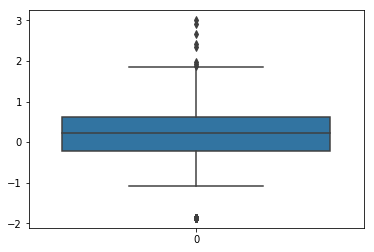

In [10]:
sns.boxplot(data=df['Column5'])
#df = df.drop(df[df.Column5 > 2].index)
df = df.drop(df[df.Column5 < -1].index)
#df = df.drop(df[(df.Column5 < -1) & (df.Column14 < 2)].index)

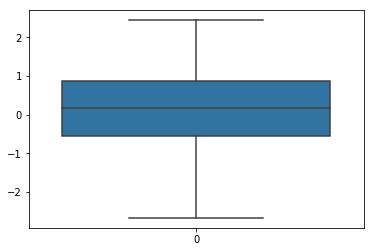

In [11]:
sns.boxplot(data=df['Column8'])

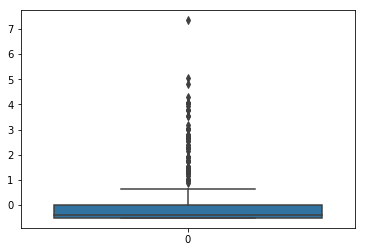

In [12]:
sns.boxplot(data=df['Column10'])
df = df.drop(df[df.Column5 > 1].index)
#df = df.drop(df[(df.Column5 > 1) & (df.Column14 < 2)].index)

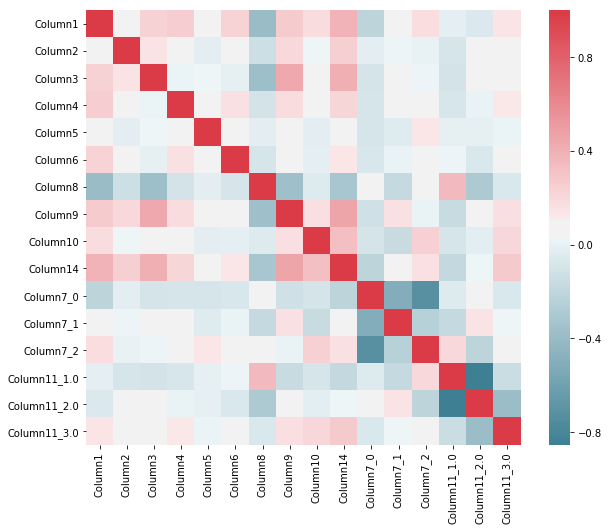

In [13]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [14]:
#df.drop(['Column4', 'Column7_2'], axis=1)

In [15]:
y = df['Column14']
X = df.drop(['Column14'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=50)

## Decision Tree

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [19]:
print('Accuracy : ' + str(accuracy_score(y_test, dt_pred)))
print(classification_report(y_test,dt_pred))

Accuracy : 0.6923076923076923
             precision    recall  f1-score   support

          0       0.82      0.85      0.84        33
          1       0.43      0.50      0.46        12
          2       1.00      0.25      0.40         4
          3       0.33      0.50      0.40         2
          4       0.00      0.00      0.00         1

avg / total       0.71      0.69      0.68        52



/home/budiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn.model_selection import KFold
from sklearn import metrics

# create a 10-fold cross validation
kf = KFold(n_splits=10, random_state=50)

In [21]:
# create a desision tree model

accuracy = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dt = tree.DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    accuracy += metrics.accuracy_score(y_test, dt_pred)
    
    
print ("Accuracy of Decision Tree : ", accuracy / kf.get_n_splits())

Accuracy of Decision Tree :  0.5442684766214178


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [24]:
print('Accuracy : ' + str(accuracy_score(y_test, gnb_pred)))
print(classification_report(y_test,gnb_pred))

Accuracy : 0.7254901960784313
             precision    recall  f1-score   support

          0       0.88      0.94      0.91        32
          1       0.60      0.55      0.57        11
          2       0.00      0.00      0.00         2
          3       1.00      0.17      0.29         6
          4       0.00      0.00      0.00         0

avg / total       0.80      0.73      0.73        51



/home/budiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [25]:
accuracy = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    gnb_pred = gnb.predict(X_test)
    accuracy += metrics.accuracy_score(y_test, gnb_pred)
    
    
print ("Accuracy of Naive Bayes : ", accuracy / kf.get_n_splits())

Accuracy of Naive Bayes :  0.5737179487179487


## kNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier 

In [27]:
train_acc = []
test_acc  = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train ,y_train))
    test_acc.append(knn.score(X_test ,y_test))

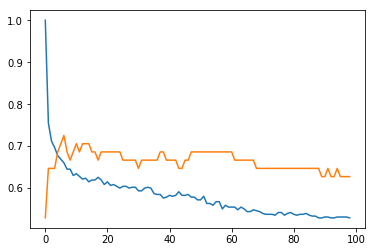

In [28]:
plt.plot(train_acc)
plt.plot(test_acc)

In [39]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [40]:
print('Accuracy : ' + str(accuracy_score(y_test, knn_pred)))
print(classification_report(y_test,knn_pred))

Accuracy : 0.6326530612244898
             precision    recall  f1-score   support

          0       0.67      0.96      0.79        27
          1       0.67      0.31      0.42        13
          2       0.25      0.25      0.25         4
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         1

avg / total       0.56      0.63      0.57        49



/home/budiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
accuracy = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    accuracy += metrics.accuracy_score(y_test, knn_pred)
    
    
print ("Accuracy of kNN : ", accuracy / kf.get_n_splits())

Accuracy of kNN :  0.5929110105580693


## MLPC

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
mlpc = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(112,14,), random_state=123, max_iter=1000)
mlpc = mlpc.fit(X_train, y_train)
mlpc_pred = mlpc.predict(X_test)

In [34]:
print('Accuracy : ' + str(accuracy_score(y_test, mlpc_pred)))
print(classification_report(y_test,mlpc_pred))

Accuracy : 0.803921568627451
             precision    recall  f1-score   support

          0       0.91      1.00      0.96        32
          1       0.80      0.73      0.76        11
          2       0.33      0.50      0.40         2
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00         0

avg / total       0.76      0.80      0.78        51



/home/budiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/budiman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [35]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# create a 10-fold cross validation
kf = KFold(n_splits=10, random_state=50)
skf = StratifiedKFold(n_splits=10, random_state=50)

print('Cross Validation Result\n')
#name = ['Decision Tree', 'Naive Bayes', 'kNN', 'MLPC']
#cons = [dt,gnb,knn,mlpc]

name = ['Naive Bayes','Decision Tree','kNN','MLPC']
cons = [GaussianNB(),tree.DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=10),MLPClassifier(solver='lbfgs', hidden_layer_sizes=(112,14,), random_state=123, max_iter=1000)]

for algo, c in zip(name,cons):
    print(algo + '\n')
    print('K Fold')
    accuracy = 0
    precision = 0
    recall = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlpc = c

        mlpc = mlpc.fit(X_train, y_train)
        mlpc_pred = mlpc.predict(X_test)
        accuracy += metrics.accuracy_score(y_test, mlpc_pred)
        precision += metrics.precision_score(y_test, mlpc_pred, average='micro')
        recall += metrics.recall_score(y_test, mlpc_pred, average='micro')

    print ("Accuracy  : ", accuracy / kf.get_n_splits())
    print ("Precision : ", precision / kf.get_n_splits())
    print ("Recall    : ", recall / kf.get_n_splits())
    print ("F1 score  : ", 2*(((precision*recall)/100)/((precision+recall)/10)))
    print('\n')
    
    print('Stratified K Fold')
    accuracy = 0
    precision = 0
    recall = 0
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        mlpc = c

        mlpc = mlpc.fit(X_train, y_train)
        mlpc_pred = mlpc.predict(X_test)
        accuracy += metrics.accuracy_score(y_test, mlpc_pred)
        precision += metrics.precision_score(y_test, mlpc_pred, average='micro')
        recall += metrics.recall_score(y_test, mlpc_pred, average='micro')

    print ("Accuracy  : ", accuracy / kf.get_n_splits())
    print ("Precision : ", precision / kf.get_n_splits())
    print ("Recall    : ", recall / kf.get_n_splits())
    print ("F1 score  : ", 2*(((precision*recall)/100)/((precision+recall)/10)))
    print('\n')

Cross Validation Result

Naive Bayes

K Fold
Accuracy  :  0.5737179487179487
Precision :  0.5737179487179487
Recall    :  0.5737179487179487
F1 score  :  0.5737179487179488


Stratified K Fold
Accuracy  :  0.5716298973064472
Precision :  0.5716298973064472
Recall    :  0.5716298973064472
F1 score  :  0.5716298973064472


Decision Tree

K Fold
Accuracy  :  0.5268099547511311
Precision :  0.5268099547511311
Recall    :  0.5268099547511311
F1 score  :  0.5268099547511311


Stratified K Fold
Accuracy  :  0.5447061841024106
Precision :  0.5447061841024106
Recall    :  0.5447061841024106
F1 score  :  0.5447061841024105


kNN

K Fold
Accuracy  :  0.5868778280542986
Precision :  0.5868778280542986
Recall    :  0.5868778280542986
F1 score  :  0.5868778280542987


Stratified K Fold
Accuracy  :  0.5869119902758716
Precision :  0.5869119902758716
Recall    :  0.5869119902758716
F1 score  :  0.5869119902758716


MLPC

K Fold
Accuracy  :  0.6240573152337857
Precision :  0.6240573152337857
Recall    

In [36]:
from sklearn.externals import joblib

# save naive bayes
#joblib.dump(gnb, 'naive_bayes.out')

# save decision tree
#joblib.dump(dt, 'decision_tree.out')

# save k nearest neighbors
#joblib.dump(knn, 'k_nearest.out')

# save multi layer perceptron
#joblib.dump(mlpc, 'multi_layer_perceptron.out')